# Binary Bird Classifer from Using CNN

Open Soundscape: http://opensoundscape.org/en/latest/train.html

First, use the following packages to create a machine learning classifier. First, from OpenSoundscape import the following three functions (`run_command`, `binary_train_valid_split`, and `train`) and three classes (`Audio`, `Spectrogram`, and `SingleTargetAudioDataset`).

In [1]:
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.datasets import SingleTargetAudioDataset

from opensoundscape.helpers import run_command
from opensoundscape.data_selection import binary_train_valid_split
from opensoundscape.torch.train import train

# For working with dataframes, arrays, and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For importing data / audio-related python library
import librosa
import os
import pandas as pd


# Split the data into n-segment chunks

## Import Data
Import all the audio files and resample to 44.1kHz

In [2]:
def find_n_second_multiples_and_filenames(dir_path, n): 
    """ 
    dir_path (path): path of a directory with desired files
    n (int): split data into n-second clips
    wav_data (n dimensional list)
    """
    
    wav_data = []
    allfilenames = []
    timestamp = []

    for filename in os.listdir(dir_path):
        filepath = os.path.join(dir_path, filename)
        print(filepath)
        
        data, sr = librosa.load(filepath, sr=44100)
        num_samples_in_n_seconds =  n  * sr 
        length_data = len(data)
        length_in_seconds = length_data / sr 
        
        if length_data < num_samples_in_n_seconds: 
            pass
        
        elif length_data > num_samples_in_n_seconds: 
            data = data[:-(length_data % num_samples_in_n_seconds)]
            num_of_n_clips = int(np.floor(length_data / num_samples_in_n_seconds))
            
            for i in range(num_of_n_clips): 
                allfilenames.append(filename)
                data_n_seconds = data[i*num_samples_in_n_seconds:(i+1)*num_samples_in_n_seconds]
                timestamp.append([i*n,(i+1)*n])
                wav_data.append(data_n_seconds)

        else: #length_data == num_samples_in_n_seconds: 
            allfilenames.append(filename)
            wav_data.append([data])
            
    return wav_data, allfilenames, timestamp


# Labelling Dataset

In order to use a binary bird classifier with a CNN, we need to label the audio files we input to see if it has a bird or not. The dataset we will be using to train the CNN will ultimately have audio files from AudioSet and Xeno Canto data. 

In [3]:
dir_path = '/home/e4e/Desktop/binary_bird_small_testset' #pwd and also os.path.expanduser
wav_data, allfilenames, timestamp = find_n_second_multiples_and_filenames(dir_path, 10)

/home/e4e/Desktop/binary_bird_small_testset/_8MvhMlbwiE_40.000.wav
/home/e4e/Desktop/binary_bird_small_testset/_6spzSHLoY0_30.000.wav
/home/e4e/Desktop/binary_bird_small_testset/_7AHvLZsXFQ_580.000.wav
/home/e4e/Desktop/binary_bird_small_testset/_8HcEdMMbzQ_130.000.wav
/home/e4e/Desktop/binary_bird_small_testset/XC22019 - Blue-crowned Trogon - Trogon curucui.mp3


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/home/e4e/Desktop/binary_bird_small_testset/XC22072 - Sapphire-spangled Emerald - Amazilia lactea.mp3


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/XC22279 - Greyish Mourner - Rhytipterna simplex.mp3
/home/e4e/Desktop/binary_bird_small_testset/_3ZOigx8e3c_30.000.wav


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/_5mfNxFuXos_30.000.wav
/home/e4e/Desktop/binary_bird_small_testset/_4oW93l094k_30.000.wav
/home/e4e/Desktop/binary_bird_small_testset/_1woPC5HWSg_30.000.wav
/home/e4e/Desktop/binary_bird_small_testset/XC22193 - Red-necked Woodpecker - Campephilus rubricollis.mp3
/home/e4e/Desktop/binary_bird_small_testset/_4rolMIFkgQ_30.000.wav


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/XC22208 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3
/home/e4e/Desktop/binary_bird_small_testset/_3yc8z3kXgg_30.000.wav


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/XC22082 - Channel-billed Toucan - Ramphastos vitellinus.mp3
/home/e4e/Desktop/binary_bird_small_testset/XC22270 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/_5FQFj1d9Qs_550.000.wav
/home/e4e/Desktop/binary_bird_small_testset/_3F2ThHyn64_30.000.wav
/home/e4e/Desktop/binary_bird_small_testset/XC22087 - Silky-tailed Nightjar - Antrostomus sericocaudatus.mp3
/home/e4e/Desktop/binary_bird_small_testset/XC22269 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/e4e/Desktop/binary_bird_small_testset/XC22099 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3
/home/e4e/Desktop/binary_bird_small_testset/XC22035 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3


/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/e4e/acoustic-species-id-environments/Yoo-Jin/opensoundscape/opensoundscape-env/lib/python3.8/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Since we are using xeno canto data (which is labelled data - bird and not bird), we need to label each of these files. In order to do so, we extract this information from the filename. Note that all the xeno canto data starts with 'XC'. 

In [4]:
def label_files(file_list): 
    bird_present_binary = []
    bird_species_list = []
    for f in file_list: 
        if f[:2] == 'XC':
            bird_present_binary.append(1)
            bird_species_list.append(os.path.splitext(f.split("-",1)[1].strip())[0])
        else:
            bird_present_binary.append(0)
            bird_species_list.append('N/A')
    return bird_species_list, bird_present_binary
            
bird_species_list, bird_present_binary = label_files(allfilenames)

assert(len(allfilenames)==len(bird_present_binary))
assert(len(bird_species_list)==len(bird_present_binary))

In [5]:
print(bird_species_list, bird_present_binary)

['N/A', 'N/A', 'N/A', 'N/A', 'Blue-crowned Trogon - Trogon curucui', 'Blue-crowned Trogon - Trogon curucui', 'White-bellied Tody-Tyrant - Hemitriccus griseipectus', 'White-bellied Tody-Tyrant - Hemitriccus griseipectus', 'White-bellied Tody-Tyrant - Hemitriccus griseipectus', 'White-bellied Tody-Tyrant - Hemitriccus griseipectus', 'N/A', 'N/A', 'N/A', 'N/A', 'Red-necked Woodpecker - Campephilus rubricollis', 'N/A', 'White-crested Spadebill - Platyrinchus platyrhynchos', 'N/A', 'Channel-billed Toucan - Ramphastos vitellinus', 'N/A', 'N/A', 'Silky-tailed Nightjar - Antrostomus sericocaudatus', 'Silky-tailed Nightjar - Antrostomus sericocaudatus', 'White-bellied Tody-Tyrant - Hemitriccus griseipectus', 'White-bellied Tody-Tyrant - Hemitriccus griseipectus'] [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]


## Put all this data into a Pandas dataframe
There would be a pandas dataframe that would include filenames, the timestamp of the file, if a bird is present in the file, and the bird species.

In [6]:
print(allfilenames)

['_8MvhMlbwiE_40.000.wav', '_6spzSHLoY0_30.000.wav', '_7AHvLZsXFQ_580.000.wav', '_8HcEdMMbzQ_130.000.wav', 'XC22019 - Blue-crowned Trogon - Trogon curucui.mp3', 'XC22019 - Blue-crowned Trogon - Trogon curucui.mp3', 'XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3', 'XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3', 'XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3', 'XC22211 - White-bellied Tody-Tyrant - Hemitriccus griseipectus.mp3', '_3ZOigx8e3c_30.000.wav', '_5mfNxFuXos_30.000.wav', '_4oW93l094k_30.000.wav', '_1woPC5HWSg_30.000.wav', 'XC22193 - Red-necked Woodpecker - Campephilus rubricollis.mp3', '_4rolMIFkgQ_30.000.wav', 'XC22208 - White-crested Spadebill - Platyrinchus platyrhynchos.mp3', '_3yc8z3kXgg_30.000.wav', 'XC22082 - Channel-billed Toucan - Ramphastos vitellinus.mp3', '_5FQFj1d9Qs_550.000.wav', '_3F2ThHyn64_30.000.wav', 'XC22087 - Silky-tailed Nightjar - Antrostomus sericocaudatus.mp3', 'XC22087 - Silky-tailed Nightj

In [7]:
print(len(allfilenames))
print(len(timestamp))
print(len(bird_present_binary))
print(len(bird_species_list))

25
13
25
25


In [8]:
labels = {'Filenames': allfilenames,
        'Bird present': bird_present_binary,
        'Bird species': bird_species_list
        }

df = pd.DataFrame(labels, columns = ['Filenames', 'Bird present', 'Bird species'])
label_dict = {0:'bird-absent', 1:'bird-present'}

print(df)
print(label_dict)

                                            Filenames  Bird present  \
0                              _8MvhMlbwiE_40.000.wav             0   
1                              _6spzSHLoY0_30.000.wav             0   
2                             _7AHvLZsXFQ_580.000.wav             0   
3                             _8HcEdMMbzQ_130.000.wav             0   
4   XC22019 - Blue-crowned Trogon - Trogon curucui...             1   
5   XC22019 - Blue-crowned Trogon - Trogon curucui...             1   
6   XC22211 - White-bellied Tody-Tyrant - Hemitric...             1   
7   XC22211 - White-bellied Tody-Tyrant - Hemitric...             1   
8   XC22211 - White-bellied Tody-Tyrant - Hemitric...             1   
9   XC22211 - White-bellied Tody-Tyrant - Hemitric...             1   
10                             _3ZOigx8e3c_30.000.wav             0   
11                             _5mfNxFuXos_30.000.wav             0   
12                             _4oW93l094k_30.000.wav             0   
13    

In [9]:
# Make allfilenames into a path 

# '/Volumes/Elements/Binary_Bird_Classifer_Small_Testset/[\'5D0E8668.WAV\', \'5D0E8668.WAV\', \'5D0E8668.WAV\', \'5D0E8668.WAV\', \'5D0E8668.WAV\', \'5D0E8668.WAV\', \'5D0EA4E0.WAV\', \'5D0EA4E0.WAV\', \'5D0EA4E0.WAV\', \'5D0EA4E0.WAV\', \'5D0EA4E0.WAV\', \'5D0EA4E0.WAV\', \'5D0EA738.WAV\', \'5D0EA738.WAV\', \'5D0EA738.WAV\', \'5D0EA738.WAV\', \'5D0EA738.WAV\', \'5D0EA738.WAV\', \'5D0EA990.WAV\', \'5D0EA990.WAV\', \'5D0EA990.WAV\', \'5D0EA990.WAV\', \'5D0EA990.WAV\', \'5D0EA990.WAV\', \'5D0EABE8.WAV\', \'5D0EABE8.WAV\', \'5D0EABE8.WAV\', \'5D0EABE8.WAV\', \'5D0EABE8.WAV\', \'5D0EABE8.WAV\', \'5D0EAE40.WAV\', \'5D0EAE40.WAV\', \'5D0EAE40.WAV\', \'5D0EAE40.WAV\', \'5D0EAE40.WAV\', \'5D0EAE40.WAV\', \'5D0EB098.WAV\', \'5D0EB098.WAV\', \'5D0EB098.WAV\', \'5D0EB098.WAV\', \'5D0EB098.WAV\', \'5D0EB098.WAV\', \'5D0EB2F0.WAV\', \'5D0EB2F0.WAV\', \'5D0EB2F0.WAV\', \'5D0EB2F0.WAV\', \'5D0EB2F0.WAV\', \'5D0EB2F0.WAV\', \'5D0EC808.WAV\', \'5D0EC808.WAV\', \'5D0EC808.WAV\', \'5D0EC808.WAV\', \'5D0EC808.WAV\', \'5D0EC808.WAV\', \'5D0FC078.WAV\', \'5D0FC078.WAV\', \'5D0FC078.WAV\', \'5D0FC078.WAV\', \'5D0FC078.WAV\', \'5D0FC078.WAV\', \'XC22404 - Black Antbird - Cercomacroides serva.mp3\', \'XC22404 - Black Antbird - Cercomacroides serva.mp3\', \'XC22458 - White-eyed Antwren - Epinecrophylla leucophthalma.mp3\', \'XC22458 - White-eyed Antwren - Epinecrophylla leucophthalma.mp3\', \'XC23434 - White-winged Shrike-Tanager - Lanio versicolor.mp3\', \'XC23434 - White-winged Shrike-Tanager - Lanio versicolor.mp3\', "XC40313 - Goeldi\'s Antbird - Akletos goeldii.mp3", "XC40313 - Goeldi\'s Antbird - Akletos goeldii.mp3", "XC40313 - Goeldi\'s Antbird - Akletos goeldii.mp3", "XC40313 - Goeldi\'s Antbird - Akletos goeldii.mp3", "XC40313 - Goeldi\'s Antbird - Akletos goeldii.mp3", "XC40313 - Goeldi\'s Antbird - Akletos goeldii.mp3"]'
s = pd.Series(allfilenames)

for i in range(len(allfilenames)): 
    df['Filenames'] = '/home/e4e/Desktop/binary_bird_small_testset/' + allfilenames[i]
    

In [10]:
print(df)

                                            Filenames  Bird present  \
0   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
1   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
2   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
3   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
4   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
5   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
6   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
7   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
8   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
9   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
10  /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
11  /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
12  /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
13  /h

In [11]:
print(df.head)

<bound method NDFrame.head of                                             Filenames  Bird present  \
0   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
1   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
2   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
3   /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
4   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
5   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
6   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
7   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
8   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
9   /home/e4e/Desktop/binary_bird_small_testset/XC...             1   
10  /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
11  /home/e4e/Desktop/binary_bird_small_testset/XC...             0   
12  /home/e4e/Desktop/binary_bird_small_testset

# Machine learning: training

Biologists are increasingly using acoustic recorders to study species of interest. Many bioacousticians want to determine the identity of the sounds they have recorded; a variety of manual and automated methods exist for this purpose. Automated methods can make it easier and faster to quickly predict which species or sounds are in one's recordings.

Using a process called machine learning, bioacousticians can create (or "train") algorithms that can predict the identities of species vocalizing in acoustic recordings. These algorithms, called classifiers, typically do not identify sounds using the recording alone. Instead, they use image recognition techniques to identify sounds in spectrograms created from short segments of audio.

This tutorial will guide you through the process of training a simple classifier for a single species. To download the tutorial as a Jupyter Notebook and run it on your own computer, click the "Edit on GitHub" button at the top right of the tutorial. You will have to [install OpenSoundscape](installation.html#installation) to use the tutorial.

Import the following machine learning-related modules. OpenSoundscape uses PyTorch to do machine learning.

In [12]:
import torch
import torch.nn
import torch.optim
import torchvision.models

Lastly, use a few miscellaneous functions.

In [13]:
# For interacting with paths on the filesystem
import os.path
from pathlib import Path
from sklearn.model_selection import train_test_split

# For handling output of the training function
import io
from contextlib import redirect_stdout

## Prepare audio data

### Download labeled audio files

Training a machine learning model requires some pre-labeled data. These data, in the form of audio recordings or spectrograms, are labeled with whether or not they contain the sound of the species of interest. These data can be obtained from online databases such as Xeno-Canto.org, or by labeling one's own ARU data using a program like Cornell's "Raven" sound analysis software.

For ML pipelines, we need a training, validation, and test set. 
Outline: 
- Use audio augmented data of the actual test set for the training and validation set (split)
- Then use the actual test set (collection of Xeno Canto data and Audioset) for the test set 

1. Training set: sample of data used to fit the model AKA the actual dataset that we use to train the model (audio augmented set of data)
2. Validation: sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters
3. Test set: sample of data used to provide an unbiased evaluation of a final model fit on the training dataset (usually unlabelled data)

Sources: 
https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7 

### Audio Augmentation
Reference for audio augmentation as seen here: https://github.com/UCSD-E4E/passive-acoustic-biodiversity/blob/master/Audio_Data_Augmentation/Data_Augmentation_Tutorial.ipynb

In [14]:
print(len(df))
df.head()

25


,Filenames,Bird present,Bird species
0,/home/e4e/Desktop/binary_bird_small_testset/XC...,0,N/A
1,/home/e4e/Desktop/binary_bird_small_testset/XC...,0,N/A
2,/home/e4e/Desktop/binary_bird_small_testset/XC...,0,N/A
3,/home/e4e/Desktop/binary_bird_small_testset/XC...,0,N/A
4,/home/e4e/Desktop/binary_bird_small_testset/XC...,1,Blue-crowned Trogon - Trogon curucui


In [15]:
train_df, valid_df = train_test_split(df, train_size=0.8, stratify=labels['Bird present'])


In [16]:
num_samples = df.shape[0]
num_present = sum(df['Bird present'] == 1)
print(f"Fraction of original dataframe with bird species present: {num_present/num_samples:.2f}")

num_train_samples = train_df.shape[0]
num_train_present = sum(train_df['Bird present'] == 1)
print(f"Fraction of train samples with bird species present: {num_train_present/num_train_samples:.2f}")
    
num_valid_samples = valid_df.shape[0]
num_valid_present = sum(valid_df['Bird present'] == 1)
print(f"Fraction of train samples with bird species present: {num_valid_present/num_valid_samples:.2f}")


Fraction of original dataframe with bird species present: 0.52
Fraction of train samples with bird species present: 0.50
Fraction of train samples with bird species present: 0.60


### Format as `SingleTargetAudioDataset`s

Turn these dataframes into "Datasets" using the `SingleTargetAudioDataset` class. Once they are set up in this class, they can be used by the training algorithm. Data augmentation could be applied in this step, but is not demonstrated here; for more information, see the [relevant API documentation](api.html#opensoundscape.datasets.SingleTargetAudioDataset).

To use this class, specify the names of the relevant columns in the dataframes:

In [17]:
train_dataset = SingleTargetAudioDataset(
    df=train_df, label_dict=label_dict, label_column='Bird present', filename_column='Filenames', add_noise=True)
valid_dataset = SingleTargetAudioDataset(
    df=valid_df, label_dict=label_dict, label_column='Bird present', filename_column='Filenames', add_noise=True)


## Train the machine learning model
Next, set up the architecture of the machine learning model and train it. 

### Set up model architecture
The model architecture is a neural network. Neural networks are so-named for their loose similarity to neurons. Each **neuron** takes in a small amount of data, performs a transformation to the data, and passes it on with some weight to the next neuron. Neurons are usually organized in **layers**; each neuron in one layer can be connected to one or multiple neurons in the next layer. Complex structures can arise from this series of connections.

The neural network used here is a combination of a feature extractor and a classifier. The **feature extractor** is a convolutional neural network (CNN). CNNs are a special class of neural network commonly used for image classification. They are able to interpret pixels that are near each other to identify shapes or textures in images, like lines, dots, and edges. During the training process, the CNN learns which shapes and textures are important for distinguishing between different classes.

The specific CNN used here is `resnet18`, using the `pretrained=True` option. This means that the model loaded is a version that somebody has already trained on another image dataset called ImageNet, so it has a head start on understanding features commonly seen in images. Although spectrograms aren't the same type of images as the photographs used in ImageNet, using the pretrained model will allow the model to more quickly adapt to identifying spectrograms.

In [18]:
model = torchvision.models.resnet18(pretrained = True)

Although we refer to the whole neural network as a classifier, the part of the neural network that actually does the species classification is its `fc`, or "fully connected," layers. This part of the neural network is called "fully connected" because it consists of several layers of neurons, where every neuron in each layer is connected to every other neuron in its adjacent layers.

These layers come after the CNN layers, which have already interpreted an image's features. The `fc` layers then use those interpretations to classify the image. The number of output features of the CNN, therefore, is the number of input features of the `fc` layers:

In [19]:
model.fc.in_features

512

Use a `Linear` classifier for the `fc`. To set up the `Linear` classifier, identify the input and output size for this classifier. As described above, the `fc` takes in the outputs of the feature extractor, so `in_features = model.fc.in_features`. The model identifies one species, so it has to be able to output a "present" or "absent" classification. Thus, `out_features=2`. A multi-species model would use `out_features=number_of_species`.

In [20]:
model.fc = torch.nn.Linear(in_features = model.fc.in_features, out_features = 2)


### Train the model

Next, create set up a directory in which to save results.

In [21]:
results_path = Path('/home/e4e/Desktop/model_train_results')
if not results_path.exists(): results_path.mkdir()


In [22]:
print(results_path)

/home/e4e/Desktop/model_train_results


The scikit-learn function may throw errors when calculating metrics; the following code will silence them.

In [23]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Finally, run the model training with the following parameters:
* `save_dir`: the directory in which to save results (which is created if it doesn't exist)
* `model`: the model set up in the previous cell
* `train_dataset`: the training dataset created using `SingleTargetAudioDataset`
* `optimizer`: the optimizer to use for training the algorithm
* `loss_fn`: the loss function used to assess the algorithm's performance during training
* `epochs`: the number of times the model will run through the training data
* `log_every`: how frequently to save performance data and save intermediate machine learning weights (`log_every=1` will save every epoch)

The `train` function allows the user to control more parameters, but they are not demonstrated here. For more information, see the [train API](http://opensoundscape.org/en/latest/api.html#module-opensoundscape.torch.train).

In [24]:
train_outputs = io.StringIO()
print(train_outputs)

with redirect_stdout(train_outputs):
    train(
        save_dir = results_path,
        model = model,
        train_dataset = train_dataset,
        valid_dataset = valid_dataset,
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-3),
        loss_fn = torch.nn.CrossEntropyLoss(),
        epochs=5,
        log_every=1,
        print_logging=True,
    )
    

## Evaluate model performance
When training is complete, it is important to check the training results to see how well the model identifies sounds. This model was only trained on a limited amount of data, so the model is expected to not be usable--it is for demonstration purposes only.

The outputs of the training function were saved to `train_outputs`. Check out the first 100 characters of this output.

Notes on the statistics: 
- loss: In neural network, we want to minimize the error and the objective function for this is called a loss function. The value calculated by the loss function is referred to as "loss" 
- accuracy: Accuracy is the fraction of prediction our model got right aka the number of correct predictions / total number of predictions
- precision: Answers the question: what proportion of positive identifications was actually correct? A model that produces no false positives (e.g. labels an audio file as a bird but does not contain any bird sounds) would have a precision of 1.0. Equation: TP / (TP + FP) 
- recall: Answers the question: what proportion of actual positives was identified correctly? A model that produces no false negatives has a recall of 1.0. So, in equation form: TP/ TP + FN
- f1: A metric that relies on both precision and recall. 

Resources: 
- https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall 

In [25]:
source_text = train_outputs.getvalue()
print(source_text)

Epoch 0
  Training.
  Validating.
  Validation results:
    train_loss: 0.8142339870333671
    train_accuracy: 0.25
    train_precision: [0.   0.25]
    train_recall: [0.   0.25]
    train_f1: [0.   0.25]
    valid_accuracy: 0.4
    valid_precision: [0.4 0. ]
    valid_recall: [0.4 0. ]
    valid_f1: [0.4 0. ]
  Saved results to /home/e4e/Desktop/model_train_results/epoch-0.tar.
Epoch 1
  Training.
  Validating.
  Validation results:
    train_loss: 0.6826314836740494
    train_accuracy: 0.6
    train_precision: [0.25 0.35]
    train_recall: [0.25 0.35]
    train_f1: [0.25 0.35]
    valid_accuracy: 0.4
    valid_precision: [0.4 0. ]
    valid_recall: [0.4 0. ]
    valid_f1: [0.4 0. ]
  Saved results to /home/e4e/Desktop/model_train_results/epoch-1.tar.
Epoch 2
  Training.
  Validating.
  Validation results:
    train_loss: 0.8149477183818817
    train_accuracy: 0.5
    train_precision: [0.3 0.2]
    train_recall: [0.3 0.2]
    train_f1: [0.3 0.2]
    valid_accuracy: 0.4
    valid_preci

These functions help to parse the log text. They simply extract the resulting "metric" in each epoch. Metrics include accuracy, precision, recall, and f1 score.

In [26]:
def extract_all_lines_containing(source_text, str_to_extract):
    """Case-sensitive search for lines containing str_to_extract"""
    finished = False
    lines = source_text.split('\n')
    extract_lines = [line for line in lines if str_to_extract in line]
    return extract_lines

def strip_log(log, sep=':     '):
    return log.split(sep)[1]

def get_metric_from_log(source_text, metric):
    if 'precision' in metric or 'recall' in metric:
        return [float(strip_log(line, sep=': ').strip('[]').split()[1]) for line in extract_all_lines_containing(source_text, metric)]
    return [float(strip_log(line, sep=': ')) for line in extract_all_lines_containing(source_text, metric)]

In [27]:
# get_metric_from_log(source_text, 'precision')
# get_metric_from_log(source_text, 'accuracy')
# get_metric_from_log(source_text, 'recall')
# get_metric_from_log(source_text, 'f1 score')

Plot the validation accuracy each epoch. These results will look different every time the model is trained, as it is a stochastic process (randomly determined).

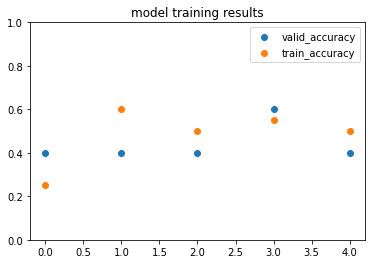

In [28]:
metrics_to_plot = ['valid_accuracy', 'train_accuracy']
fig, ax = plt.subplots(1, 1)
for metric in metrics_to_plot:
    results = get_metric_from_log(source_text, metric)
    ax.scatter(range(len(results)), results)
ax.set_ylim(0, 1)
ax.set_title('model training results')
ax.legend(metrics_to_plot)
plt.show()

Lastly, this command "cleans up" by deleting all the downloaded files and results. Only run this if you are ready to remove the results of this analysis.

In [29]:
#import shutil
# Delete results
#shutil.rmtree(results_path)